<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/groupassignment2025retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Regression Task & Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1.1 Load train.csv data (adjust the file path as needed)
train_df = pd.read_csv('train.csv')

# 1.2 Display basic information about the dataset
print("Initial shape of train data:", train_df.shape)
print(train_df.head())
print(train_df.info())

# 1.3 Handle missing values (drop rows with missing values; you can choose other strategies if needed)
train_df_clean = train_df.dropna()
print("Shape after dropping missing values:", train_df_clean.shape)

# 1.4 Check if any force_meas values are <= 0
if (train_df_clean['force_meas'] <= 0).any():
    print("Warning: There are force_meas values <= 0!")
else:
    print("All force_meas values are positive.")

# 1.5 Apply logarithmic transformation to force_meas (optional but recommended for large values)
train_df_clean['log_force_meas'] = np.log(train_df_clean['force_meas'])

# 1.6 Select input features: use all columns except 'force_meas' and 'log_force_meas'
feature_cols = [col for col in train_df_clean.columns if col not in ['force_meas', 'log_force_meas']]
print("Selected feature columns:", feature_cols)

# 1.7 If there is a categorical feature 'tappingsteelgrade', apply one-hot encoding
if 'tappingsteelgrade' in feature_cols:
    train_df_clean = pd.get_dummies(train_df_clean, columns=['tappingsteelgrade'], prefix='tappingsteelgrade')
    # Update the feature columns list after encoding
    feature_cols = [col for col in train_df_clean.columns if col not in ['force_meas', 'log_force_meas']]
    print("Feature columns after encoding:", feature_cols)

# 1.8 Split the data into training and validation sets (80% train / 20% validation)
X = train_df_clean[feature_cols]
y = train_df_clean['log_force_meas']  # using the log-transformed target for training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# 1.9 Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Feature scaling completed. Sample of scaled training features:")
print(X_train_scaled[:5])


Initial shape of train data: (64000, 35)
  tappingsteelgrade   force_meas     speed  entrytemperature  \
0          GL4G71R1  58204143.19  2.634871       1000.661121   
1          GL4G71R1  53211949.94  3.947747       1020.846126   
2          JV7P1BP6  43513598.87  1.573130        829.078290   
3          JT5P31P2  33293124.30  2.979649        736.655045   
4          JT5P32P1  68174217.63  3.401038        893.722030   

   entrytemperaturebot  entrytemperaturecore  entrytemperaturetop  \
0           939.942163           1034.327117           916.847574   
1           991.621746           1044.907925           975.227384   
2           786.696648            857.833946           763.533963   
3           734.483511            738.987016           730.511453   
4           867.859688            913.164933           850.840106   

   entrythickness  entrywidth  exitthickness  ...  pctni    pcto    pctp  \
0        0.080232    3.496171       0.065490  ...  0.004  0.0000  0.0153   
1      

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tappingsteelgrade     64000 non-null  object 
 1   force_meas            64000 non-null  float64
 2   speed                 64000 non-null  float64
 3   entrytemperature      64000 non-null  float64
 4   entrytemperaturebot   64000 non-null  float64
 5   entrytemperaturecore  64000 non-null  float64
 6   entrytemperaturetop   64000 non-null  float64
 7   entrythickness        64000 non-null  float64
 8   entrywidth            64000 non-null  float64
 9   exitthickness         64000 non-null  float64
 10  zeropoint             64000 non-null  float64
 11  radius                64000 non-null  float64
 12  pctal                 64000 non-null  float64
 13  pctb                  64000 non-null  float64
 14  pctc                  64000 non-null  float64
 15  pct

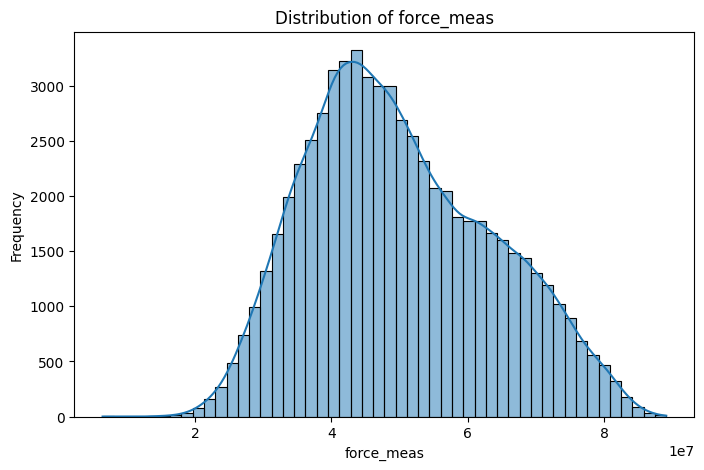

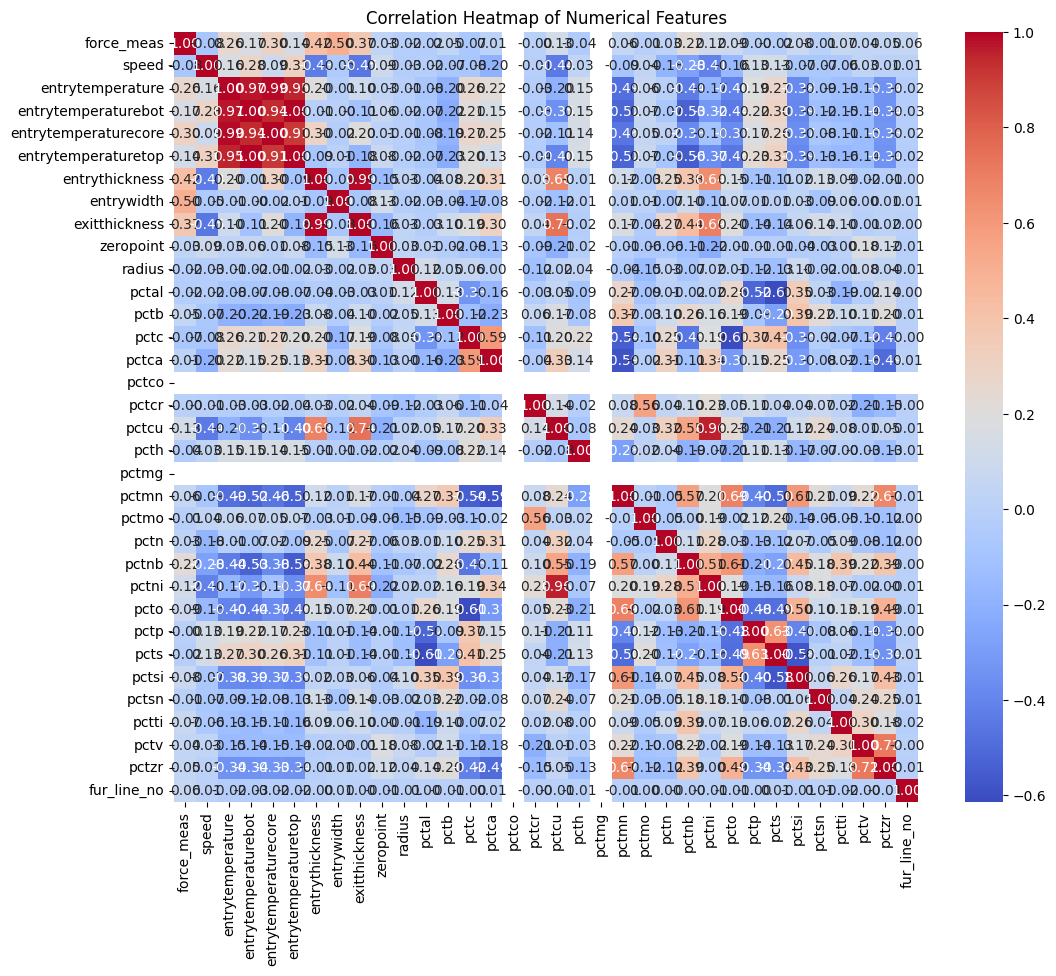


tappingsteelgrade Value Counts:
tappingsteelgrade
JU5P26P6    8653
JT5P31P1    8653
JT5P31P2    6948
GL4G71R1    5899
JT5P31P6    5549
IL5R52R1    5469
GL4G61R1    5042
JT5P32P1    4732
JT5Q6JP6    4433
JT5P32P6    3062
IT4Q33P1    1610
JL5Q67P3    1417
JL5Q67P1    1014
JT5P3AP6     792
IL6666T1     252
GL4G62R1     121
JL4B71P6     115
JT5Q61P6      94
JT5P3AP1      66
JV7P1BP6      21
JT5P3AP8      20
JU5F11P6      13
JL4B72P6      13
JT5Q6BP1      12
Name: count, dtype: int64


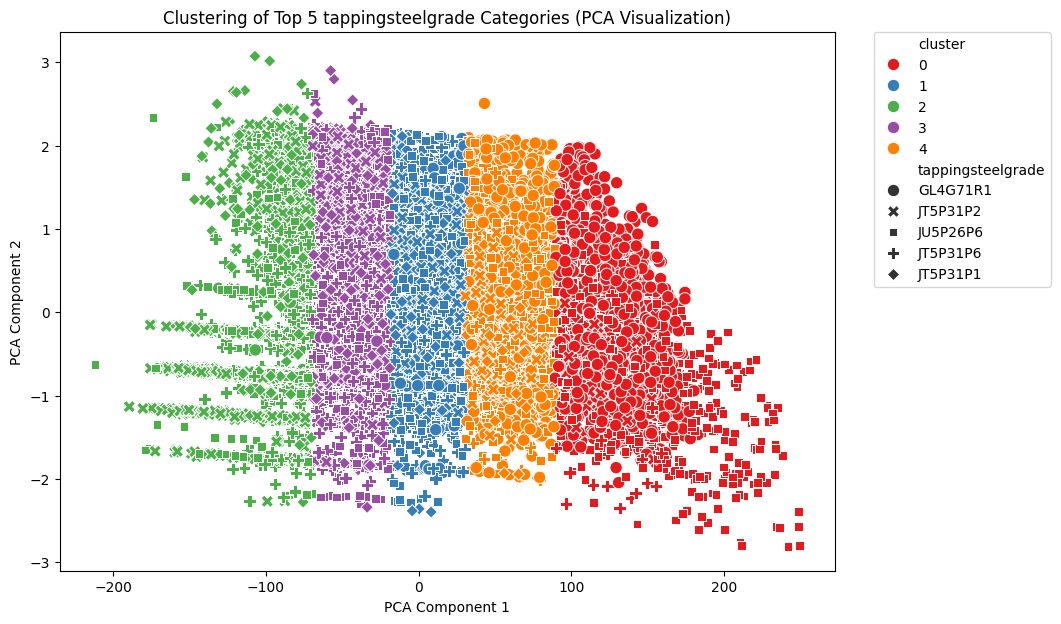

In [4]:
# Import necessary libraries for EDA and clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the train data (assuming train.csv is in the current directory)
df = pd.read_csv('train.csv')

# ---------------------- Exploratory Data Analysis (EDA) ----------------------
# Print basic info of the dataframe
print("DataFrame Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot distribution of target variable (force_meas)
plt.figure(figsize=(8, 5))
sns.histplot(df['force_meas'], bins=50, kde=True)
plt.title("Distribution of force_meas")
plt.xlabel("force_meas")
plt.ylabel("Frequency")
plt.show()

# Plot correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
numeric_features = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ---------------------- Feature Engineering ----------------------
# For demonstration, assume we keep all numeric features and tappingsteelgrade for clustering.
# If necessary, you can add feature selection steps here.

# ---------------------- Clustering Analysis on tappingsteelgrade ----------------------
# We will perform clustering analysis on a subset of data: top 5 frequent tappingsteelgrade categories.
# First, check the value counts of tappingsteelgrade
print("\ntappingsteelgrade Value Counts:")
print(df['tappingsteelgrade'].value_counts())

# Select top 5 frequent categories
top5_categories = df['tappingsteelgrade'].value_counts().nlargest(5).index.tolist()
df_cluster = df[df['tappingsteelgrade'].isin(top5_categories)].copy()

# For clustering, select a subset of numerical features (for example, speed, entrytemperature, and entrythickness)
# You can adjust the features based on domain knowledge
features_for_clustering = ['speed', 'entrytemperature', 'entrythickness']
X_cluster = df_cluster[features_for_clustering].values

# Apply KMeans clustering with 5 clusters (since we have 5 categories)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)
df_cluster['cluster'] = cluster_labels

# Use PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)
df_cluster['pca1'] = X_pca[:, 0]
df_cluster['pca2'] = X_pca[:, 1]

# Plot the clustering results with PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_cluster, x='pca1', y='pca2', hue='cluster', style='tappingsteelgrade', palette='Set1', s=80)
plt.title("Clustering of Top 5 tappingsteelgrade Categories (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


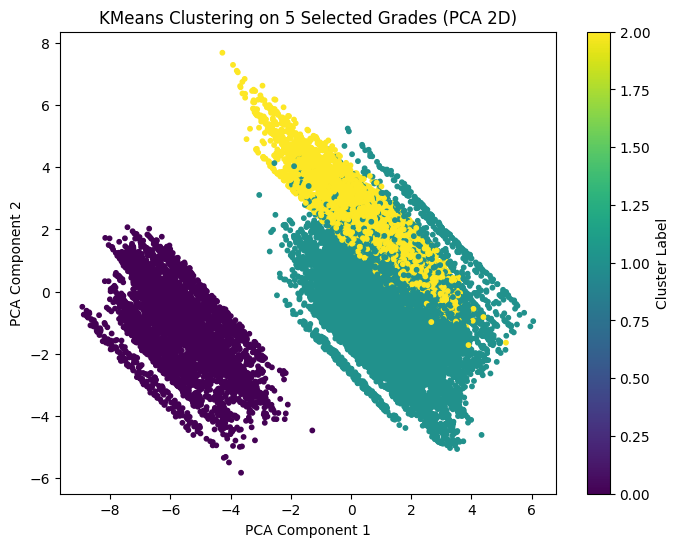

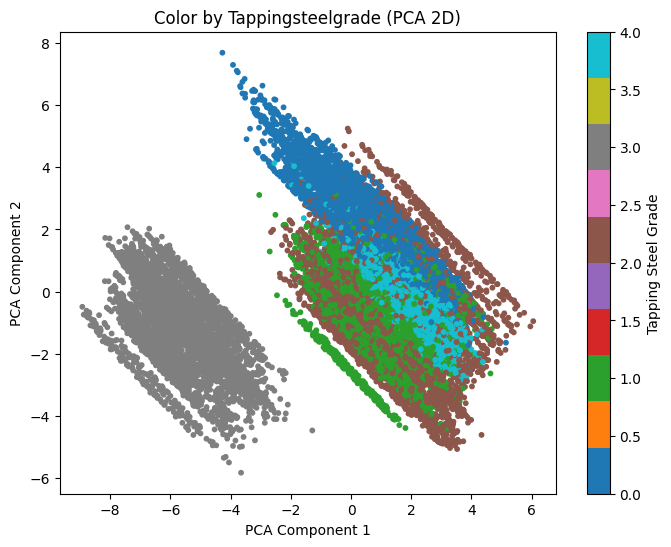

Clustering complete. Please check the plots for distribution.


In [5]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2.1 Choose five tappingsteelgrade categories (example: top 5 by count)
chosen_grades = ['JU5P26P6', 'JT5P31P1', 'JT5P31P2', 'GL4G71R1', 'JT5P31P6']

# 2.2 Filter the dataframe
df_clustering = train_df[train_df['tappingsteelgrade'].isin(chosen_grades)].copy()

# 2.3 Select numeric features (excluding force_meas if present)
numeric_cols = [
    'speed', 'entrytemperature', 'entrytemperaturebot', 'entrytemperaturecore',
    'entrytemperaturetop', 'entrythickness', 'entrywidth', 'exitthickness',
    'zeropoint', 'radius', 'pctal', 'pctb', 'pctc', 'pctca', 'pctco', 'pctcr',
    'pctcu', 'pcth', 'pctmg', 'pctmn', 'pctmo', 'pctn', 'pctnb', 'pctni',
    'pcto', 'pctp', 'pcts', 'pctsi', 'pctsn', 'pctti', 'pctv', 'pctzr',
    'fur_line_no'
]

# 2.4 Prepare data for clustering
X_cluster = df_clustering[numeric_cols].values

# 2.5 Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 2.6 Apply KMeans clustering (e.g., 3 clusters just for demonstration)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 2.7 Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 2.8 Plot the clustering results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.title('KMeans Clustering on 5 Selected Grades (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 2.9 (Optional) Plot by tappingsteelgrade to compare
grade_to_int = {g: i for i, g in enumerate(chosen_grades)}
grade_colors = df_clustering['tappingsteelgrade'].map(grade_to_int).values

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=grade_colors, cmap='tab10', s=10)
plt.colorbar(label='Tapping Steel Grade')
plt.title('Color by Tappingsteelgrade (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

print("Clustering complete. Please check the plots for distribution.")


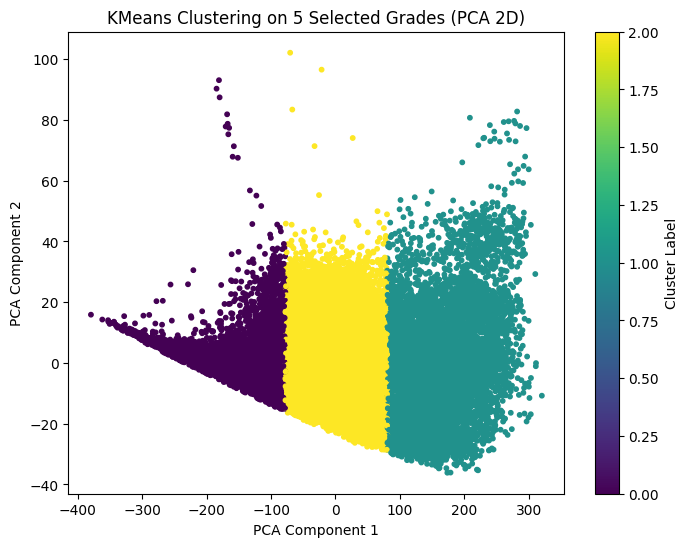

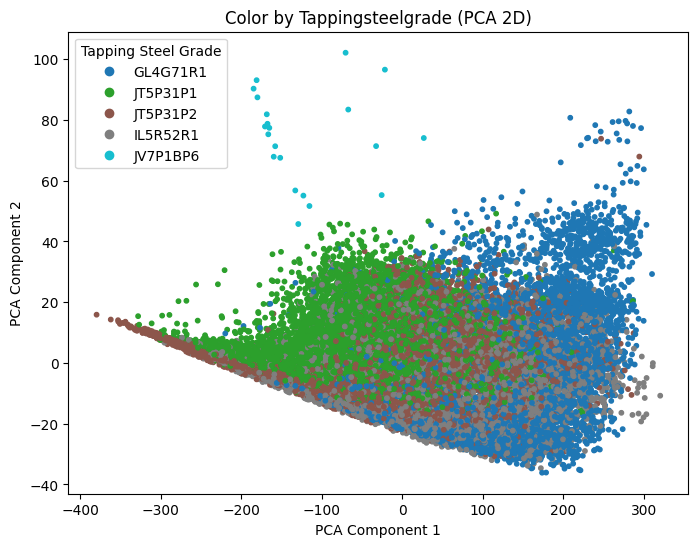

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 2.1 Filter data for 5 selected tappingsteelgrade categories

selected_grades = ['GL4G71R1', 'JT5P31P1', 'JT5P31P2', 'IL5R52R1', 'JV7P1BP6']
filtered_df = train_df[train_df['tappingsteelgrade'].isin(selected_grades)].copy()

# 2.2 Select numerical columns (already preprocessed/scaled if needed)
# Here we assume you have a scaled feature matrix named 'X_scaled' that corresponds
# exactly to the same rows in 'filtered_df'. If you haven't done scaling yet,
# you can apply scaling here. For demonstration, let's suppose you already have
# scaled features in 'X_scaled_5grades'.
feature_cols = [
    'speed', 'entrytemperature', 'entrytemperaturebot', 'entrytemperaturecore',
    'entrytemperaturetop', 'entrythickness', 'entrywidth', 'exitthickness',
    'zeropoint', 'radius', 'pctal', 'pctb', 'pctc', 'pctca', 'pctco', 'pctcr',
    'pctcu', 'pcth', 'pctmg', 'pctmn', 'pctmo', 'pctn', 'pctnb', 'pctni',
    'pcto', 'pctp', 'pcts', 'pctsi', 'pctsn', 'pctti', 'pctv', 'pctzr',
    'fur_line_no'
]
# Make sure the rows of X_scaled_5grades match the filtered_df rows
X_5grades = filtered_df[feature_cols].values

# 2.3 (Optional) Apply scaling if not scaled yet
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_5grades_scaled = scaler.fit_transform(X_5grades)

# 2.4 Perform PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_5grades)  # or X_5grades_scaled if scaled

# 2.5 KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca_2d)

# 2.6 Plotting the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.colorbar(label='Cluster Label')
plt.title('KMeans Clustering on 5 Selected Grades (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 2.7 (Optional) Compare with actual tappingsteelgrade categories
# We can map each tappingsteelgrade to a numeric ID just for color plotting
grade_to_id = {g: i for i, g in enumerate(selected_grades)}
grade_ids = [grade_to_id[g] for g in filtered_df['tappingsteelgrade']]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=grade_ids, cmap='tab10', s=10)
plt.title('Color by Tappingsteelgrade (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Create a legend for the tappingsteelgrade
handles, _ = scatter.legend_elements()
legend_labels = [f"{g}" for g in selected_grades]
plt.legend(handles, legend_labels, title='Tapping Steel Grade', loc='best')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# ============================
# Step 1: Data Preprocessing
# ============================

# Load the dataset (assumes train.csv is uploaded in your Colab environment)
df = pd.read_csv('train.csv')  # 请确保文件路径正确

# Drop missing values (if any)
df = df.dropna()

# Verify that all force_meas values are positive
if (df['force_meas'] <= 0).any():
    raise ValueError("There are non-positive force_meas values.")

# ============================
# Step 2: Feature Selection & Encoding
# ============================

# Select features (exclude the target 'force_meas')
features = df.drop(columns=['force_meas'])
target = df['force_meas']

# Convert categorical column 'tappingsteelgrade' using one-hot encoding
if 'tappingsteelgrade' in features.columns:
    features = pd.get_dummies(features, columns=['tappingsteelgrade'], drop_first=True)

# ============================
# Step 3: Feature Scaling
# ============================

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ============================
# Step 4: Train-Test Split
# ============================

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# ============================
# Step 5: Define Models and Hyperparameter Grids
# ============================

# Linear Regression (no hyperparameters to tune, so we use cross_val_score directly)
lr = LinearRegression()

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# ============================
# Step 6: 5-Fold Cross-Validation and Grid Search
# ============================

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 6.1 Linear Regression CV (using negative MAE as scoring)
lr_cv_scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
print("Linear Regression CV MAE:", -np.mean(lr_cv_scores))

# 6.2 Decision Tree Grid Search
dt_grid = GridSearchCV(dt, dt_param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("Decision Tree best params:", dt_grid.best_params_)
print("Decision Tree CV MAE:", -dt_grid.best_score_)

# 6.3 Random Forest Grid Search
rf_grid = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Random Forest best params:", rf_grid.best_params_)
print("Random Forest CV MAE:", -rf_grid.best_score_)

# 6.4 Gradient Boosting Grid Search
gb_grid = GridSearchCV(gb, gb_param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)
print("Gradient Boosting best params:", gb_grid.best_params_)
print("Gradient Boosting CV MAE:", -gb_grid.best_score_)

# ============================
# Step 7: Evaluate Models on Validation Set
# ============================

# Dictionary to store models for evaluation
models = {
    'Linear Regression': lr,
    'Decision Tree': dt_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'Gradient Boosting': gb_grid.best_estimator_
}

# Fit and evaluate each model on the validation set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"{name} Validation MAE: {mae}")
    print(f"{name} Validation RMSE: {rmse}")


Linear Regression CV MAE: 5531112.709253748


In [ ]:
# ============================
# Step: Load and Preprocess Test Data
# ============================

import pandas as pd

# Load test dataset (请确保文件路径正确)
test_df = pd.read_csv('test.csv')
y_test = test_df['force_meas']  # 如果测试数据中包含 force_meas

# Drop missing values if any
test_df = test_df.dropna()

# 如果 test.csv 中包含目标列（如 force_meas 或 baseline force_pre），需要剔除它们
# 这里假设 test.csv 包含 force_pre 列作为 baseline，需要先保存 baseline
if 'force_pre' in test_df.columns:
    baseline_force_pre = test_df['force_pre']
    test_df = test_df.drop(columns=['force_pre'])
else:
    baseline_force_pre = None

# 如果 test 数据中也包含 'force_meas' 列（不用于预测），则去除
if 'force_meas' in test_df.columns:
    test_df = test_df.drop(columns=['force_meas'])

# 与训练集保持一致，进行相同的特征编码
# 假设训练时对 tappingsteelgrade 使用了 pd.get_dummies，并 drop_first=True
if 'tappingsteelgrade' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['tappingsteelgrade'], drop_first=True)

# 如果训练集经过特征工程后有固定的列顺序，可以按训练集顺序重新排列 test_df 的列
# 例如：
# required_columns = features.columns  # features 是训练时得到的 DataFrame
# test_df = test_df.reindex(columns=required_columns, fill_value=0)

# 使用之前训练时拟合的 scaler 对 test 数据进行缩放
X_test_scaled = scaler.transform(test_df)


In [ ]:
# Load the test dataset (modify the file path if needed)
test_df = pd.read_csv('test.csv')

# Assume the test dataset contains the ground truth 'force_meas' and baseline predictions 'force_pre'
y_test = test_df['force_meas'].values
baseline_force_pre = test_df['force_pre'].values

# Calculate baseline metrics
baseline_force_pre_MAE = mean_absolute_error(y_test, baseline_force_pre)
baseline_force_pre_MSE = mean_squared_error(y_test, baseline_force_pre)
baseline_force_pre_RMSE = np.sqrt(baseline_force_pre_MSE)

print("Baseline (force_pre) MAE: {:.4f}".format(baseline_force_pre_MAE))
print("Baseline (force_pre) RMSE: {:.4f}".format(baseline_force_pre_RMSE))
print("Baseline (force_pre) MSE: {:.4f}".format(baseline_force_pre_MSE))


In [ ]:
# Save the best models for reproducibility
import pickle
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assign the best estimators to variables for saving
best_rf_model = rf_grid.best_estimator_
best_gb_model = gb_grid.best_estimator_

# Save the Random Forest model
with open('best_random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)  # best_rf_model 为你调参后的最佳随机森林模型

# Save the Gradient Boosting model
with open('best_gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(best_gb_model, f)  # best_gb_model 为你调参后的最佳梯度提升模型

print("Models have been saved successfully.")

# Load the saved models
with open('best_random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)
with open('best_gradient_boosting_model.pkl', 'rb') as f:
    loaded_gb_model = pickle.load(f)

print("Models have been loaded successfully.")

# 假设测试集数据已处理好，分为 X_test_scaled 和 y_test，同时测试数据中包含 baseline force_pre (baseline_force_pre)
# X_test_scaled: 测试集特征（经过与训练时相同的特征缩放处理）
# y_test: 测试集真实值（force_meas）
# baseline_force_pre: baseline 模型预测值，用于对比

# Evaluate Random Forest model on test data
start_time = time.time()
rf_predictions = loaded_rf_model.predict(X_test_scaled)
rf_runtime = (time.time() - start_time) / len(X_test_scaled)  # 每个样本的平均预测时间

rf_mae = mean_absolute_error(y_test, rf_predictions)
# rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
# rf_mse = mean_squared_error(y_test, rf_predictions)
# Calculate MSE and then compute RMSE manually
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Test MAE: {:.4f}".format(rf_mae))
print("Random Forest Test RMSE: {:.4f}".format(rf_rmse))
print("Random Forest Test MSE: {:.4f}".format(rf_mse))
print("Random Forest Average prediction runtime per sample: {:.4f} seconds".format(rf_runtime))

# Evaluate Gradient Boosting model on test data
start_time = time.time()
gb_predictions = loaded_gb_model.predict(X_test_scaled)
gb_runtime = (time.time() - start_time) / len(X_test_scaled)

gb_mae = mean_absolute_error(y_test, gb_predictions)
# gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
# gb_mse = mean_squared_error(y_test, gb_predictions)
# Calculate MSE and then compute RMSE manually
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)

print("Gradient Boosting Test MAE: {:.4f}".format(gb_mae))
print("Gradient Boosting Test RMSE: {:.4f}".format(gb_rmse))
print("Gradient Boosting Test MSE: {:.4f}".format(gb_mse))
print("Gradient Boosting Average prediction runtime per sample: {:.4f} seconds".format(gb_runtime))

# 对比 baseline 的结果
print("Baseline (force_pre) MAE: {:.4f}".format(baseline_force_pre_MAE))
print("Baseline (force_pre) RMSE: {:.4f}".format(baseline_force_pre_RMSE))
print("Baseline (force_pre) MSE: {:.4f}".format(baseline_force_pre_MSE))


In [ ]:
# ============================
# Step: Deep Neural Network Model for Regression
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

# Load the dataset
df = pd.read_csv('train.csv')  # 请确保文件路径正确

# Drop missing values
df = df.dropna()

# Verify that all force_meas values are positive
if (df['force_meas'] <= 0).any():
    raise ValueError("There are non-positive force_meas values.")

# ============================
# Data Preprocessing and Feature Engineering
# ============================

# Log-transform the target variable to stabilize variance
df['log_force_meas'] = np.log(df['force_meas'])

# Select features (exclude the target 'force_meas' and use log_force_meas as target)
features = df.drop(columns=['force_meas', 'log_force_meas'])
target = df['log_force_meas']

# One-hot encode categorical feature 'tappingsteelgrade' if exists
if 'tappingsteelgrade' in features.columns:
    features = pd.get_dummies(features, columns=['tappingsteelgrade'], drop_first=True)

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ============================
# Train-Test Split
# ============================
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# ============================
# Build the Deep Neural Network Model
# ============================
# Define a sequential model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Setup callbacks: EarlyStopping and ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_dnn_model.h5', monitor='val_loss', save_best_only=True)

# ============================
# Train the Model
# ============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)

# ============================
# Evaluate the Model on the Validation Set
# ============================
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print("DNN Model - Validation MAE (log-transformed):", val_mae)
print("DNN Model - Validation RMSE (log-transformed):", np.sqrt(val_loss))

# ============================
# Save the Scaler for Future Use
# ============================
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("DNN model and scaler have been saved successfully.")


In [ ]:
# ============================
# Step: Train and Evaluate Models for Each of the Top 3 tappingsteelgrade Categories
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle
import time

# --- Load the datasets ---
# Assumes 'train.csv' and 'test.csv' are uploaded in your Colab environment
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Drop missing values in training data
train_df = train_df.dropna()

# Verify force_meas values are positive in training data
if (train_df['force_meas'] <= 0).any():
    raise ValueError("Non-positive force_meas values found in training data.")

# --- Define the top 3 tappingsteelgrade categories based on frequency ---
# (You can adjust these categories as needed)
top_categories = ['JU5P26P6', 'JT5P31P1', 'JT5P31P2']

# Dictionary to store the trained models and scalers for each category
models_dict = {}
scalers_dict = {}

# Define hyperparameter grid for Random Forest (as it performed best in previous steps)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over each top category
for category in top_categories:
    print(f"\n=== Processing category: {category} ===")

    # Filter training data for the current category
    cat_train = train_df[train_df['tappingsteelgrade'] == category].copy()
    # Drop the 'tappingsteelgrade' column as it is constant for this subset
    cat_train = cat_train.drop(columns=['tappingsteelgrade'])

    # Separate features and target
    X_cat = cat_train.drop(columns=['force_meas'])
    y_cat = cat_train['force_meas']

    # For simplicity，这里使用所有数值型特征（假设其余均为数值）
    # 如果有其他类别特征，可在此处进行相应编码
    # Scale features using StandardScaler
    scaler_cat = StandardScaler()
    X_cat_scaled = scaler_cat.fit_transform(X_cat)

    # Save the scaler for later use on test data
    scalers_dict[category] = scaler_cat

    # Split into training and validation sets for this category
    X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_cat_scaled, y_cat, test_size=0.2, random_state=42)

    # Use GridSearchCV to tune Random Forest hyperparameters for this category
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf_grid = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    rf_grid.fit(X_train_cat, y_train_cat)

    print("Best parameters for category {}: {}".format(category, rf_grid.best_params_))
    best_rf_model = rf_grid.best_estimator_

    # Evaluate on validation set
    y_pred_cat = best_rf_model.predict(X_val_cat)
    mae_cat = mean_absolute_error(y_val_cat, y_pred_cat)
    rmse_cat = np.sqrt(mean_squared_error(y_val_cat, y_pred_cat))
    print("Validation MAE for category {}: {:.4f}".format(category, mae_cat))
    print("Validation RMSE for category {}: {:.4f}".format(category, rmse_cat))

    # Save the best model in the dictionary
    models_dict[category] = best_rf_model

# --- Save the trained models and scalers for reproducibility ---
with open('models_by_category.pkl', 'wb') as f:
    pickle.dump(models_dict, f)
with open('scalers_by_category.pkl', 'wb') as f:
    pickle.dump(scalers_dict, f)
print("\nModels and scalers for each category have been saved successfully.")

# ============================
# Evaluate on Test Data for Each Category
# ============================
# Assumes test_df contains the same features as train_df and includes a 'force_pre' column for baseline predictions
# Also, ensure test_df has no missing values in relevant columns
test_df = test_df.dropna()

# Dictionary to store evaluation metrics for each category
evaluation_results = {}

for category in top_categories:
    print(f"\n--- Evaluating category: {category} on test data ---")
    # Filter test data for the current category
    cat_test = test_df[test_df['tappingsteelgrade'] == category].copy()

    # Store baseline predictions for comparison
    baseline_force_pre = cat_test['force_pre'].values

    # Prepare test features: drop 'force_meas', 'force_pre', and 'tappingsteelgrade'
    X_test_cat = cat_test.drop(columns=['force_meas', 'force_pre', 'tappingsteelgrade'])
    y_test_cat = cat_test['force_meas'].values

    # Retrieve the scaler for this category and scale test features
    scaler_cat = scalers_dict[category]
    X_test_cat_scaled = scaler_cat.transform(X_test_cat)

    # Retrieve the trained model for this category
    model_cat = models_dict[category]

    # Measure prediction runtime per sample
    start_time = time.time()
    predictions_cat = model_cat.predict(X_test_cat_scaled)
    total_time = time.time() - start_time
    avg_runtime = total_time / len(X_test_cat_scaled)

    # Compute evaluation metrics
    mae_cat_test = mean_absolute_error(y_test_cat, predictions_cat)
    rmse_cat_test = np.sqrt(mean_squared_error(y_test_cat, predictions_cat))
    mse_cat_test = mean_squared_error(y_test_cat, predictions_cat)

    print("Category {}:".format(category))
    print("Test MAE: {:.4f}".format(mae_cat_test))
    print("Test RMSE: {:.4f}".format(rmse_cat_test))
    print("Test MSE: {:.4f}".format(mse_cat_test))
    print("Average prediction runtime per sample: {:.4f} seconds".format(avg_runtime))

    # Compare with baseline force_pre for this category
    baseline_mae = mean_absolute_error(y_test_cat, baseline_force_pre)
    baseline_rmse = np.sqrt(mean_squared_error(y_test_cat, baseline_force_pre))
    baseline_mse = mean_squared_error(y_test_cat, baseline_force_pre)

    print("Baseline (force_pre) MAE: {:.4f}".format(baseline_mae))
    print("Baseline (force_pre) RMSE: {:.4f}".format(baseline_rmse))
    print("Baseline (force_pre) MSE: {:.4f}".format(baseline_mse))

    evaluation_results[category] = {
        'Test MAE': mae_cat_test,
        'Test RMSE': rmse_cat_test,
        'Test MSE': mse_cat_test,
        'Avg Runtime': avg_runtime,
        'Baseline MAE': baseline_mae,
        'Baseline RMSE': baseline_rmse,
        'Baseline MSE': baseline_mse
    }

print("\nEvaluation results for each category:")
print(evaluation_results)


In [ ]:
# ============================
# Step: Clustering Analysis on Selected tappingsteelgrade Categories
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ----------------------------
# Load the training data
# ----------------------------
df = pd.read_csv('train.csv')
df = df.dropna()

# ----------------------------
# Filter the data for top 5 tappingsteelgrade categories
# ----------------------------
# For example, we select the following five categories (adjust as needed)
selected_categories = ['JU5P26P6', 'JT5P31P1', 'JT5P31P2', 'GL4G71R1', 'JT5P31P6']
df_cluster = df[df['tappingsteelgrade'].isin(selected_categories)].copy()

# ----------------------------
# Feature Selection for Clustering
# ----------------------------
# Drop non-numeric columns and the target variable (force_meas)
# You can adjust the feature set based on your analysis
features = df_cluster.drop(columns=['tappingsteelgrade', 'force_meas'])

# ----------------------------
# Scale the features
# ----------------------------
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# ----------------------------
# Reduce dimensionality to 2 components using PCA for visualization
# ----------------------------
pca = PCA(n_components=2, random_state=42)
features_pca = pca.fit_transform(features_scaled)

# ----------------------------
# Perform KMeans clustering with 5 clusters (since we have 5 selected categories)
# ----------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# ----------------------------
# Plot the clustering results
# ----------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering (5 Clusters) on Selected tappingsteelgrade Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')

# Overlay true tappingsteelgrade labels for comparison
for cat in selected_categories:
    idx = df_cluster['tappingsteelgrade'] == cat
    plt.scatter(features_pca[idx, 0], features_pca[idx, 1], label=cat, edgecolors='black', alpha=0.7)
plt.legend(title="True Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# ============================
# Step A: Deep Neural Network with log-transform
# ============================

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import time

# 1. Load train.csv and drop missing
df = pd.read_csv('train.csv')
df.dropna(inplace=True)

# 2. Log-transform the target
df['log_force_meas'] = np.log(df['force_meas'])

# 3. Separate features and target
features = df.drop(columns=['force_meas', 'log_force_meas'])
target_log = df['log_force_meas']

# One-hot encode tappingsteelgrade if needed
if 'tappingsteelgrade' in features.columns:
    features = pd.get_dummies(features, columns=['tappingsteelgrade'], drop_first=True)

# Scale features
scaler_dnn = StandardScaler()
X_scaled_dnn = scaler_dnn.fit_transform(features)

# Train/validation split
X_train_dnn, X_val_dnn, y_train_dnn, y_val_dnn = train_test_split(
    X_scaled_dnn, target_log, test_size=0.2, random_state=42
)

# 4. Build a simple DNN model
# "units" and "layers" can be tuned as needed
model_dnn = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_dnn.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])

model_dnn.compile(
    optimizer='adam',
    loss='mse',   # We are predicting log(force_meas), so MSE on log-scale
    metrics=['mae']
)

# 5. Train the DNN
history = model_dnn.fit(
    X_train_dnn, y_train_dnn,
    validation_data=(X_val_dnn, y_val_dnn),
    epochs=20,
    batch_size=64,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('best_dnn_model.h5', save_best_only=True, monitor='val_loss')
    ]
)

# 6. Evaluate on validation set (log-scale)
val_loss, val_mae = model_dnn.evaluate(X_val_dnn, y_val_dnn, verbose=0)
print(f"DNN Model - Validation MAE (log-scale): {val_mae:.4f}")
print(f"DNN Model - Validation MSE (log-scale): {val_loss:.4f}")

# Save the scaler and model
with open('scaler_dnn.pkl', 'wb') as f:
    pickle.dump(scaler_dnn, f)
model_dnn.save('final_dnn_model.h5')

print("DNN model and scaler have been saved successfully.")

# ============================
# Step B: Train separate models for each tappingsteelgrade (e.g. RandomForest)
# ============================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df_category = pd.read_csv('train.csv')
df_category.dropna(inplace=True)

# We'll focus on the top 3 categories for demonstration
top_3_categories = ['JU5P26P6', 'JT5P31P1', 'JT5P31P2']  # 举例

# Dictionary to store (model, scaler) for each category
category_models = {}

for cat in top_3_categories:
    print(f"=== Processing category: {cat} ===")
    df_cat = df_category[df_category['tappingsteelgrade'] == cat].copy()
    if df_cat.empty:
        print(f"No data for category {cat}, skipping.")
        continue

    # Prepare features and target
    y = df_cat['force_meas']
    X = df_cat.drop(columns=['force_meas', 'tappingsteelgrade'])

    # Example: if you need to drop other columns or handle them, do it here
    # e.g. X.drop(columns=['some_irrelevant_column'], inplace=True)

    # Scale
    scaler_cat = StandardScaler()
    X_scaled_cat = scaler_cat.fit_transform(X)

    X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(
        X_scaled_cat, y, test_size=0.2, random_state=42
    )

    # Simple grid for random forest
    param_grid_cat = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }

    rf_cat = RandomForestRegressor(random_state=42, n_jobs=-1)
    grid_cat = GridSearchCV(rf_cat, param_grid_cat, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_cat.fit(X_train_cat, y_train_cat)

    best_params_cat = grid_cat.best_params_
    best_model_cat = grid_cat.best_estimator_

    # Evaluate on validation
    y_val_pred_cat = best_model_cat.predict(X_val_cat)
    mae_cat = np.mean(np.abs(y_val_pred_cat - y_val_cat))
    rmse_cat = np.sqrt(np.mean((y_val_pred_cat - y_val_cat)**2))

    print(f"Best parameters for category {cat}: {best_params_cat}")
    print(f"Validation MAE for category {cat}: {mae_cat:.4f}")
    print(f"Validation RMSE for category {cat}: {rmse_cat:.4f}\n")

    # Save model and scaler
    category_models[cat] = {
        'model': best_model_cat,
        'scaler': scaler_cat
    }

# Serialize models for each category
with open('category_models.pkl', 'wb') as f:
    pickle.dump(category_models, f)

print("Models and scalers for each category have been saved successfully.")

# ============================
# Step C: Final Evaluation on test.csv
# ============================

# 1. Load test.csv
test_df = pd.read_csv('test.csv')
# test_df has a column 'force_pre' as baseline predictions
# The real target is 'force_meas'
# We will compare with baseline 'force_pre'

# 2. Evaluate overall DNN on the entire test set
#    (assuming the same feature engineering as in training)
test_features = test_df.drop(columns=['force_meas', 'force_pre'])
if 'tappingsteelgrade' in test_features.columns:
    test_features = pd.get_dummies(test_features, columns=['tappingsteelgrade'], drop_first=True)

# 让 test_features 的列与训练时保持一致，如有缺失dummy列需要补齐
# (具体处理取决于你在训练集里编码后的列情况)

# Load the saved DNN scaler and model
loaded_scaler_dnn = pickle.load(open('scaler_dnn.pkl', 'rb'))
loaded_dnn_model = tf.keras.models.load_model('final_dnn_model.h5')

# Scale test features
X_test_dnn = loaded_scaler_dnn.transform(test_features)

# DNN predictions (log-scale)
start_time = time.time()
log_preds_dnn = loaded_dnn_model.predict(X_test_dnn).ravel()
runtime_dnn = (time.time() - start_time) / len(X_test_dnn)

# Convert log preds back to original scale
preds_dnn = np.exp(log_preds_dnn)

# Compute metrics vs. force_meas
y_test = test_df['force_meas'].values
mae_dnn = np.mean(np.abs(preds_dnn - y_test))
rmse_dnn = np.sqrt(np.mean((preds_dnn - y_test)**2))
mse_dnn = np.mean((preds_dnn - y_test)**2)

print("\n--- DNN Model on Full Test Set ---")
print(f"DNN Test MAE: {mae_dnn:.4f}")
print(f"DNN Test RMSE: {rmse_dnn:.4f}")
print(f"DNN Test MSE: {mse_dnn:.4f}")
print(f"DNN Average prediction runtime per sample: {runtime_dnn:.6f} seconds")

# 3. Evaluate baseline
baseline_force_pre = test_df['force_pre'].values
mae_baseline = np.mean(np.abs(baseline_force_pre - y_test))
rmse_baseline = np.sqrt(np.mean((baseline_force_pre - y_test)**2))
mse_baseline = np.mean((baseline_force_pre - y_test)**2)

print("\n--- Baseline (force_pre) ---")
print(f"Baseline MAE: {mae_baseline:.4f}")
print(f"Baseline RMSE: {rmse_baseline:.4f}")
print(f"Baseline MSE: {mse_baseline:.4f}")

# 4. Evaluate category-wise models
with open('category_models.pkl', 'rb') as f:
    loaded_cat_models = pickle.load(f)

# Group test data by tappingsteelgrade
test_results_by_cat = {}

for cat in top_3_categories:
    # Subset test data for this category
    test_cat = test_df[test_df['tappingsteelgrade'] == cat].copy()
    if test_cat.empty:
        continue

    y_test_cat = test_cat['force_meas'].values
    baseline_cat = test_cat['force_pre'].values

    # Prepare features for this category (same approach as training)
    X_cat = test_cat.drop(columns=['force_meas', 'force_pre', 'tappingsteelgrade'])

    # Scale
    cat_scaler = loaded_cat_models[cat]['scaler']
    cat_model = loaded_cat_models[cat]['model']

    X_cat_scaled = cat_scaler.transform(X_cat)

    start_cat = time.time()
    preds_cat = cat_model.predict(X_cat_scaled)
    runtime_cat = (time.time() - start_cat) / len(X_cat_scaled)

    mae_cat = np.mean(np.abs(preds_cat - y_test_cat))
    rmse_cat = np.sqrt(np.mean((preds_cat - y_test_cat)**2))
    mse_cat = np.mean((preds_cat - y_test_cat)**2)

    # Baseline
    mae_base_cat = np.mean(np.abs(baseline_cat - y_test_cat))
    rmse_base_cat = np.sqrt(np.mean((baseline_cat - y_test_cat)**2))
    mse_base_cat = np.mean((baseline_cat - y_test_cat)**2)

    test_results_by_cat[cat] = {
        'Test MAE': mae_cat,
        'Test RMSE': rmse_cat,
        'Test MSE': mse_cat,
        'Avg Runtime': runtime_cat,
        'Baseline MAE': mae_base_cat,
        'Baseline RMSE': rmse_base_cat,
        'Baseline MSE': mse_base_cat
    }

# Print category-wise results
print("\n--- Category-wise Results ---")
for cat, metrics_dict in test_results_by_cat.items():
    print(f"Category {cat}:")
    print(f"  Test MAE: {metrics_dict['Test MAE']:.4f}")
    print(f"  Test RMSE: {metrics_dict['Test RMSE']:.4f}")
    print(f"  Test MSE: {metrics_dict['Test MSE']:.4f}")
    print(f"  Average prediction runtime per sample: {metrics_dict['Avg Runtime']:.6f} seconds")
    print(f"  Baseline MAE: {metrics_dict['Baseline MAE']:.4f}")
    print(f"  Baseline RMSE: {metrics_dict['Baseline RMSE']:.4f}")
    print(f"  Baseline MSE: {metrics_dict['Baseline MSE']:.4f}\n")

# ============================
# Step D: Optional Visualization Example
# ============================

import matplotlib.pyplot as plt

# Example: compare category-wise MAE with baseline
cats = list(test_results_by_cat.keys())
model_mae = [test_results_by_cat[cat]['Test MAE'] for cat in cats]
base_mae = [test_results_by_cat[cat]['Baseline MAE'] for cat in cats]

x = np.arange(len(cats))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, model_mae, width, label='RF Model MAE')
plt.bar(x + width/2, base_mae, width, label='Baseline MAE')
plt.xticks(x, cats, rotation=45)
plt.ylabel('MAE')
plt.title('Category-wise MAE Comparison')
plt.legend()
plt.tight_layout()
plt.show()
